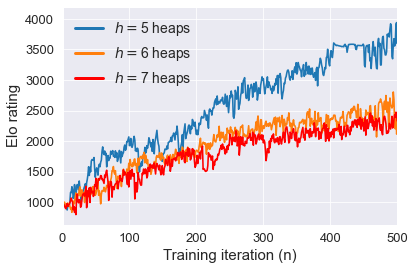

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_context("paper", font_scale=1.5)

sns.set_style("darkgrid")
def smooth(scalars, weight=0.9):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)  # Save it
        last = smoothed_val  # Anchor the last smoothed value

    return smoothed

colors = ['deepskyblue', 'seagreen', 'darkred']
for i, file in enumerate(os.listdir('./Elo_rating')):
    if file.endswith('.csv'):
        label=file.split('_')[0].split('-')[1]
        data = pd.read_csv('./Elo_rating/' + file)
        x = data['Step']
        y = data['Value']
        if label == '7':
            g = sns.lineplot(x, smooth(y, weight=0.1), linewidth=1.6, label=r'$\mathit{h=}' +f'${label} heaps', color='r')
        else:
            g = sns.lineplot(x, smooth(y, weight=0.1), linewidth=1.6, label=r'$\mathit{h=}' +f'${label} heaps')
        plt.xlim([0, 500])
        xlabels = [f'{int(x)}' for x in g.get_xticks()]
        ylabels = [int(x) for x in g.get_yticks()]
        g.set_xticklabels(xlabels, fontsize=13)
        g.set_yticklabels(ylabels, fontsize=13)

plt.ylabel(f'Elo rating', fontsize=15)
plt.xlabel('Training iteration (n)', fontsize=15)
plt.grid(True)
leg = plt.legend(loc='best', frameon=False, fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(3)
    
plt.savefig('elo_rating.pdf', bbox_inches='tight', format='pdf')
plt.show()

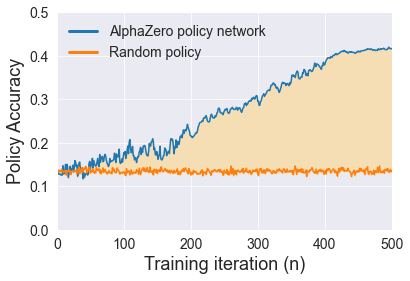

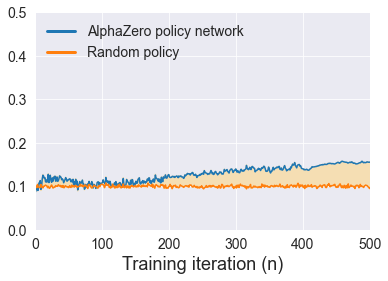

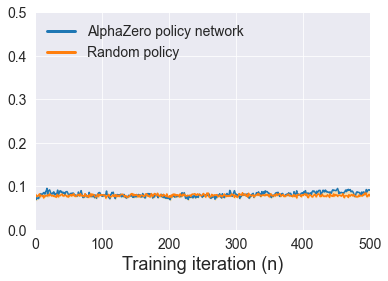

In [2]:
sns.set_context("paper", font_scale=1.5)

index = 1
for file in os.listdir('./branching_factor/'):
    if file.endswith('.csv'):
        if index % 2 == 0:
            label=file.split('_')[0].split('-')[1]
            if label == '5':
                sim = 50
            elif label == '6':
                sim = 60
            elif label == '7':
                sim = 100
            alphazero = f'run-{label}_0.35_1_128_200_{sim}_100_0.01_3_Policy_Branching_1_AlphaZero-tag-Policy_Branching_1.csv'
            random = f'run-{label}_0.35_1_128_200_{sim}_100_0.01_3_Policy_Branching_1_Random-tag-Policy_Branching_1.csv'
            
            alphazero_data = pd.read_csv('./branching_factor/' + alphazero)
            random_data = pd.read_csv('./branching_factor/' + random)
            
            x = alphazero_data['Step']
            y_alphazero = alphazero_data['Value']
            y_random = random_data['Value']
            g = sns.lineplot(x, smooth(y_alphazero, weight=0.2), linewidth=1.5, label=f'AlphaZero policy network')
            g = sns.lineplot(x, smooth(y_random, weight=0.2), linewidth=1.5, label=f'Random policy')
            
            plt.fill_between(x, smooth(y_alphazero, weight=0.1), smooth(y_random, weight=0.1), linewidth=1.5, color='wheat')

            plt.xlim([0, 500])
            plt.ylim([0, 0.5])
            xlabels = [f'{int(x)}' for x in g.get_xticks()]
            ylabels = [round(x, 2) for x in g.get_yticks()]
            g.set_xticklabels(xlabels, fontsize=14)
            g.set_yticklabels(ylabels, fontsize=14)
            
            
            if label == '5':
                plt.ylabel(f'Policy Accuracy', fontsize=18)
            plt.xlabel('Training iteration (n)', fontsize=18)
            plt.grid(True)
            leg = plt.legend(loc='upper left', frameon=False, fontsize=14)
            for line in leg.get_lines():
                line.set_linewidth(3)

            plt.savefig(f'policy_accuracy_{label}.pdf', bbox_inches='tight', format='pdf')
            plt.show()
        index += 1

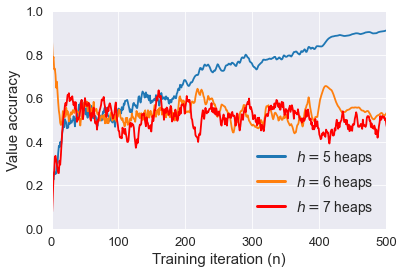

In [3]:
for file in os.listdir('./value_accuracy/'):
    if file.endswith('.csv'):
        label = r'$\mathit{h=}$' + file.split('_')[0].split('-')[1] + ' heaps'
        data = pd.read_csv('./value_accuracy/' + file)
        x = data['Step']
        y = data['Value']
        y = smooth(y, weight=0.)
        if file.split('_')[0].split('-')[1] == '7':
            g = sns.lineplot(x, smooth(y, weight=0.9), linewidth=1.8, label=str(label), color='r')
        else:
            g = sns.lineplot(x, smooth(y, weight=0.9), linewidth=1.8, label=str(label))

        plt.xlim([0, 500])
        plt.ylim([0.0, 1.0])
        xlabels = [f'{int(x)}' for x in g.get_xticks()]
        ylabels = [round(x, 1) for x in g.get_yticks()]
        g.set_xticklabels(xlabels, fontsize=13)
        g.set_yticklabels(ylabels, fontsize=13)


plt.ylabel(f'Value accuracy', fontsize=15)
plt.xlabel('Training iteration (n)', fontsize=15)
plt.grid(True)
leg = plt.legend(loc='lower right', frameon=False, fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(3)
    
plt.savefig('value_accuracy.pdf', bbox_inches='tight', format='pdf')
plt.show()

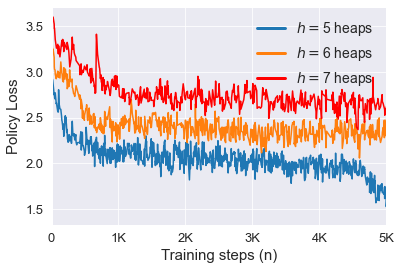

In [4]:
for file in os.listdir('./policy_loss'):
    if file.endswith('.csv'):
        label=r'$\mathit{h=}$' + file.split('_')[0].split('-')[1] + ' heaps'
        data = pd.read_csv('./policy_loss/' + file)
        x = data['Step']
        y = data['Value']
        if file.split('_')[0].split('-')[1] == '7':
            g = sns.lineplot(x, smooth(y, weight=0.2), linewidth=1.5, label=str(label), color='r')
        else:
            g = sns.lineplot(x, smooth(y, weight=0.2), linewidth=1.5, label=str(label))

        plt.xlim([0, 5000])
#         plt.ylim([0.2, 0.8])
        xlabels = [f'{int(x)}' + 'K' if x>0 else f'{int(x)}' for x in g.get_xticks()/1000]
        ylabels = [f'{round(x, 2)}' for x in g.get_yticks()]
        g.set_xticklabels(xlabels, fontsize=13)
        g.set_yticklabels(ylabels, fontsize=13)

plt.ylabel(f'Policy Loss', fontsize=15)
plt.xlabel('Training steps (n)', fontsize=15)
plt.grid(True)
leg = plt.legend(loc='best', frameon=False, fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(3)
    
plt.savefig('policy_loss.pdf', bbox_inches='tight', format='pdf')
plt.show()

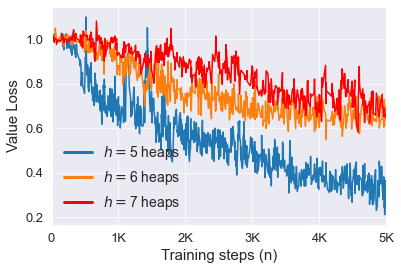

In [5]:
for file in os.listdir('./value_loss'):
    if file.endswith('.csv'):
        label=r'$\mathit{h=}$' + file.split('_')[0].split('-')[1] + ' heaps'
        data = pd.read_csv('./value_loss/' + file)
        x = data['Step']
        y = data['Value']
        if file.split('_')[0].split('-')[1] == '7':
            g = sns.lineplot(x, smooth(y, weight=0.2), linewidth=1.5, label=str(label), color='r')
        else:
            g = sns.lineplot(x, smooth(y, weight=0.2), linewidth=1.5, label=str(label))

        plt.xlim([0, 5000])
        xlabels = [f'{int(x)}' + 'K' if x>0 else f'{int(x)}' for x in g.get_xticks()/1000]
        ylabels = [f'{round(x, 2)}' for x in g.get_yticks()]
        g.set_xticklabels(xlabels, fontsize=13)
        g.set_yticklabels(ylabels, fontsize=13)

plt.ylabel(f'Value Loss', fontsize=15)
plt.xlabel('Training steps (n)', fontsize=15)
plt.grid(True)
leg = plt.legend(loc='best', frameon=False, fontsize=14)
for line in leg.get_lines():
    line.set_linewidth(3)
    
plt.savefig('value_loss.pdf', bbox_inches='tight', format='pdf')
plt.show()